In [4]:
grid = [(i, j) for j in range(101) for i in range(101)]


In [5]:
import random 
new_grid=[]
while(len(new_grid)<50):
    a = random.choice(grid)
    if a not in new_grid:
         new_grid.append(a)
print (new_grid)

[(53, 30), (38, 30), (34, 39), (90, 33), (21, 64), (98, 15), (10, 51), (79, 41), (49, 3), (74, 65), (64, 38), (49, 79), (12, 12), (64, 0), (6, 83), (0, 96), (46, 22), (34, 85), (14, 63), (99, 67), (65, 10), (17, 23), (84, 76), (62, 59), (11, 96), (10, 19), (1, 60), (13, 38), (76, 70), (75, 37), (19, 84), (35, 19), (48, 61), (47, 20), (45, 15), (51, 9), (20, 3), (74, 94), (93, 43), (33, 5), (86, 72), (13, 85), (40, 39), (100, 70), (67, 86), (20, 23), (27, 100), (56, 93), (74, 53), (28, 42)]


In [6]:
coordinates = [(75, 4), (51, 68), (2, 87), (52, 6), (8, 94), (41, 68), (41, 42), (100, 0), (69, 43), (99, 48), (52, 95), (81, 98), (90, 33), (95, 8), (55, 5), (40, 71), (10, 45), (8, 55), (58, 34), (14, 85), (22, 61), (15, 25), (93, 75), (32, 49), (100, 63), (58, 92), (89, 84), (74, 21), (59, 26), (41, 67), (69, 87), (14, 83), (28, 88), (56, 23), (44, 93), (54, 98), (7, 68), (46, 91), (12, 76), (33, 92), (4, 46), (26, 3), (52, 76), (5, 40), (29, 75), (11, 22), (83, 0), (71, 22), (28, 89), (34, 30)]

In [7]:
print (coordinates)


[(75, 4), (51, 68), (2, 87), (52, 6), (8, 94), (41, 68), (41, 42), (100, 0), (69, 43), (99, 48), (52, 95), (81, 98), (90, 33), (95, 8), (55, 5), (40, 71), (10, 45), (8, 55), (58, 34), (14, 85), (22, 61), (15, 25), (93, 75), (32, 49), (100, 63), (58, 92), (89, 84), (74, 21), (59, 26), (41, 67), (69, 87), (14, 83), (28, 88), (56, 23), (44, 93), (54, 98), (7, 68), (46, 91), (12, 76), (33, 92), (4, 46), (26, 3), (52, 76), (5, 40), (29, 75), (11, 22), (83, 0), (71, 22), (28, 89), (34, 30)]


C:\Users\amish\AppData\Local\Temp\ipykernel_8628\4246491838.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


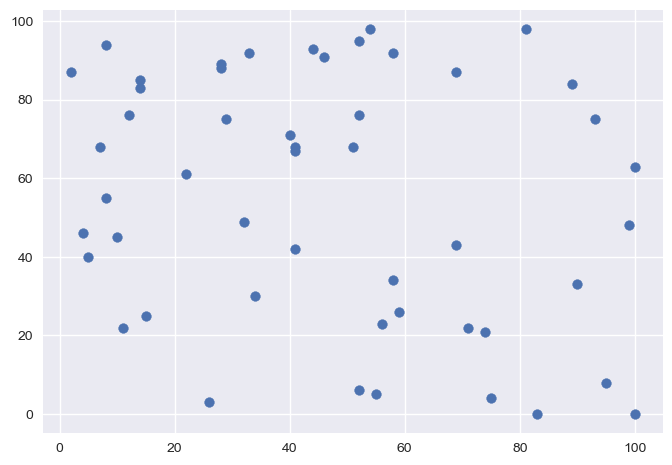

In [8]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')
x=[]
y=[]

for i in range(50):
    z=coordinates[i]
    x.append(z[0])
    y.append(z[1])

plt.scatter(x,y)
plt.show()

In [9]:
#Making Parents

def gen_parents(seed_n) :
    seed = []
    
    for i in range(50):
         seed.append(i) 
            
    
    parents=[]
    for i in range(seed_n):
        random.shuffle(seed)
        if seed not in parents:
            parents.append(seed[::])
    
    return parents 

In [10]:
#fitness function
#Here, Fitness is nothing but the distance between the coordinates
#the numbers in the parents are nothing but the indices pointing to the cities in the coordinates


In [11]:
#making fitness rank function 
#here less rank = more fit

def fitness(chromosome):
    fit=0
    for i in range(49):
        p=chromosome[i]
        q=chromosome[i+1]
        fit += ((x[p]-x[q])**2 + (y[p]-y[q])**2)**(1/(2))
    fit+=((x[q]-x[0])**2 + (y[q]-y[0])**2)**(1/(2))
    return fit

#making manhattan fitness
def mfitness(chromosome):
    fit=0
    for i in range(49):
        p=chromosome[i]
        q=chromosome[i+1]
        fit += (abs(x[p]-x[q]) + abs(y[p]-y[q])) 
    
    return fit


In [12]:
#making crossover function (1 point crossover)
def crossover(chromo1,chromo2):
    p=random.randint(0,49)
    child1=chromo1[:p]
    child2=chromo2[p:]
    for i in range(50):
        if chromo2[i] not in child1 :
            child1.append(chromo2[i])
        if chromo1[i] not in child2 :
            child2.append(chromo1[i])
    return child1,child2

In [13]:
#making mutation
def mutation(chromo1):
    gen_ran_111=list(range(35))
    r_=int(random.choice(gen_ran_111))
    mutated_element = chromo1.pop(r_)
    chromo1.append(mutated_element)
    return chromo1
    


In [19]:
#Reproduction
#to add cellular automata in selection 
seed=gen_parents(11)
i_population=seed
no_of_gen= 1500
avg_fit=[]
best_fit=[]
for j in range(no_of_gen):
    for i in range(2,len(i_population)-2):
        female=i_population[i]
        male=max(i_population[i-2:i+2],key=lambda x:fitness(x))
#         print(male)
        kids=crossover(male,female)
#         print(kids)
#         leftMale=i_population[i-1]
#         rightMale=i_population[i+1]
#         if fitness(leftMale)>fitness(rightMale):
#             kids=crossover(leftMale,female)
#         else:
#             kids=crossover(rightMale,female)
        
#     for i in range(11):
#         ran_gen_001=random.randint(0,len(i_population)-1)
#         ran_gen_002=random.randint(0,len(i_population)-1)
        
#         kids=crossover(i_population[ran_gen_001],i_population[ran_gen_002])
        i_population.extend(kids)
    i_population.sort(key = lambda x:fitness(x))
    avfit=sum(list(map(fitness,i_population)))/len(i_population)
    avg_fit.append(avfit)
    

#Elimination
    
    i_population.append(mutation(i_population[-1]))
    i_population.sort(key = lambda x:fitness(x))
    best_fit.append(fitness(i_population[0]))
    ran_gen_003=random.randint(7,11)
    i_population=i_population[:75]

In [20]:
#results of euclidean fitness
print(len(i_population))
print(i_population[0])
print(fitness(i_population[0]),fitness(i_population[-1]))
fc = i_population[0]
print(len(i_population))


75
[44, 23, 45, 21, 41, 3, 14, 47, 33, 28, 49, 43, 16, 17, 20, 40, 38, 19, 31, 2, 36, 4, 34, 32, 29, 5, 39, 48, 42, 1, 6, 18, 8, 9, 22, 24, 26, 11, 30, 35, 37, 25, 10, 15, 12, 13, 7, 46, 27, 0]
937.7533216121107 953.5214073524797
75


975.754099586325


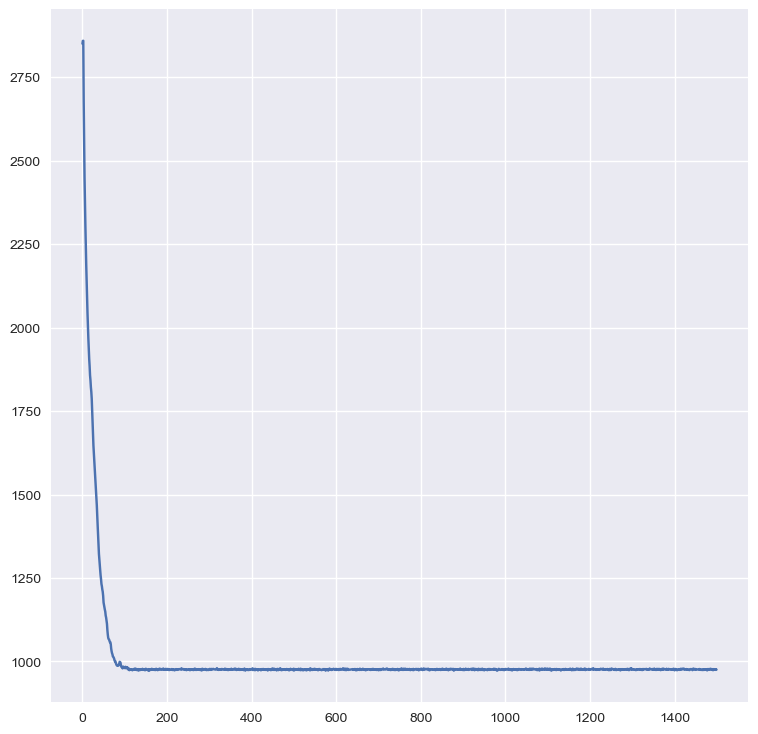

In [21]:
#avg. fitness rank  vs generation
plt.plot(list(range(no_of_gen)),avg_fit)
print(avg_fit[-1])


937.7533216121107


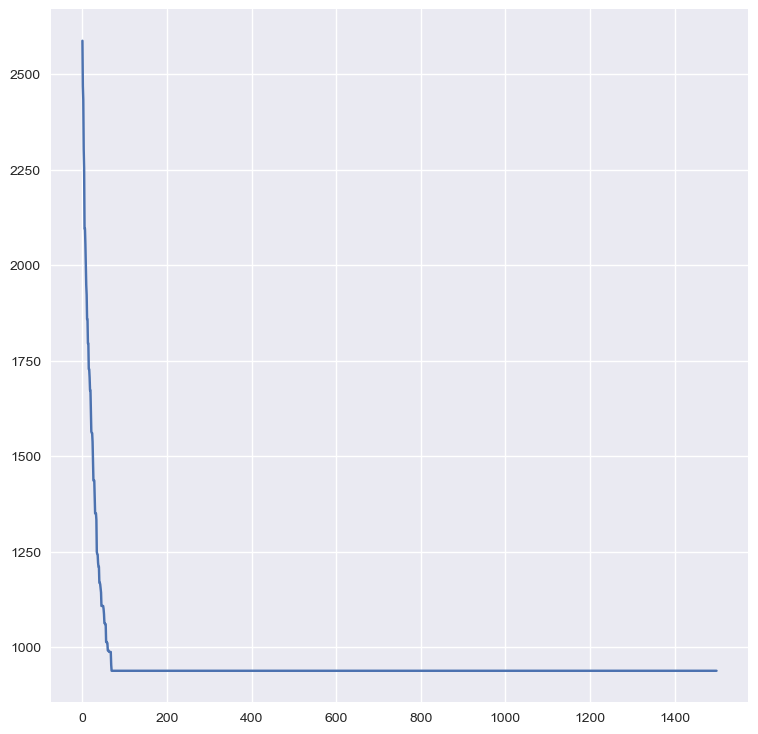

In [22]:
#best fitness rank vs generation
plt.plot(list(range(no_of_gen)),best_fit)
plt.rcParams['figure.figsize'] = [9,9]
print(best_fit[-1])

In [ ]:
print(fc)
for i in range(49):
    x1 = x[fc[i]]
    y1 = y[fc[i]]
    x2 = x[fc[i+1]]
    y2 = y[fc[i+1]]
    if(i == 0):
        plt.arrow(x1,y1,x2-x1,y2-y1,width=0.05,head_width=2,ec='green')
    else:
        plt.arrow(x1,y1,x2-x1,y2-y1,width=0.05,head_width=2)